In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd

In [3]:
from flask import Flask, jsonify

# Ignore SQLITE warnings 
import warnings
warnings.filterwarnings('ignore')

In [4]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [5]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect

In [6]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [7]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [8]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [9]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [10]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Climate Analysis

In [11]:
#"inspect" delivers runtime information about a wide variety of SQLAlchemy objects
Inspect = inspect(engine)

In [12]:
#To get the table names, we use get_table_names function from inspect
Inspect.get_table_names()

['measurement', 'station']

In [13]:
#To get the column details, we use get_column function from inspect
columns_measurement = Inspect.get_columns('measurement')
for cols in columns_measurement:
    print(cols["name"], cols["type"])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [14]:
columns_station = Inspect.get_columns('station')
for cols in columns_station:
    print(cols["name"], cols["type"])

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


In [15]:
stations = session.query(Station.station, Station.name).all()
stations

[('USC00519397', 'WAIKIKI 717.2, HI US'),
 ('USC00513117', 'KANEOHE 838.1, HI US'),
 ('USC00514830', 'KUALOA RANCH HEADQUARTERS 886.9, HI US'),
 ('USC00517948', 'PEARL CITY, HI US'),
 ('USC00518838', 'UPPER WAHIAWA 874.3, HI US'),
 ('USC00519523', 'WAIMANALO EXPERIMENTAL FARM, HI US'),
 ('USC00519281', 'WAIHEE 837.5, HI US'),
 ('USC00511918', 'HONOLULU OBSERVATORY 702.2, HI US'),
 ('USC00516128', 'MANOA LYON ARBO 785.2, HI US')]

In [16]:
tobs = session.query(Measurement.date, Measurement.prcp, Measurement.tobs).all()
tobs

[('2010-01-01', 0.08, 65.0),
 ('2010-01-02', 0.0, 63.0),
 ('2010-01-03', 0.0, 74.0),
 ('2010-01-04', 0.0, 76.0),
 ('2010-01-06', 0.0, 73.0),
 ('2010-01-07', 0.06, 70.0),
 ('2010-01-08', 0.0, 64.0),
 ('2010-01-09', 0.0, 68.0),
 ('2010-01-10', 0.0, 73.0),
 ('2010-01-11', 0.01, 64.0),
 ('2010-01-12', 0.0, 61.0),
 ('2010-01-14', 0.0, 66.0),
 ('2010-01-15', 0.0, 65.0),
 ('2010-01-16', 0.0, 68.0),
 ('2010-01-17', 0.0, 64.0),
 ('2010-01-18', 0.0, 72.0),
 ('2010-01-19', 0.0, 66.0),
 ('2010-01-20', 0.0, 66.0),
 ('2010-01-21', 0.0, 69.0),
 ('2010-01-22', 0.0, 67.0),
 ('2010-01-23', 0.0, 67.0),
 ('2010-01-24', 0.01, 71.0),
 ('2010-01-25', 0.0, 67.0),
 ('2010-01-26', 0.04, 76.0),
 ('2010-01-27', 0.12, 68.0),
 ('2010-01-28', 0.0, 72.0),
 ('2010-01-30', 0.0, 70.0),
 ('2010-01-31', 0.03, 67.0),
 ('2010-02-01', 0.01, 66.0),
 ('2010-02-03', 0.0, 67.0),
 ('2010-02-04', 0.01, 69.0),
 ('2010-02-05', 0.0, 67.0),
 ('2010-02-06', 0.0, 67.0),
 ('2010-02-07', 0.0, 64.0),
 ('2010-02-08', 0.0, 69.0),
 ('2010-02-

In [17]:
#Update the 'Measurement' table and subsitute the "prcp" with 0.0 where there is Null values or None values
engine.execute("Update Measurement SET prcp=0.0 WHERE prcp is NULL")
tobs = session.query(Measurement.date, Measurement.prcp, Measurement.tobs).all()
tobs

[('2010-01-01', 0.08, 65.0),
 ('2010-01-02', 0.0, 63.0),
 ('2010-01-03', 0.0, 74.0),
 ('2010-01-04', 0.0, 76.0),
 ('2010-01-06', 0.0, 73.0),
 ('2010-01-07', 0.06, 70.0),
 ('2010-01-08', 0.0, 64.0),
 ('2010-01-09', 0.0, 68.0),
 ('2010-01-10', 0.0, 73.0),
 ('2010-01-11', 0.01, 64.0),
 ('2010-01-12', 0.0, 61.0),
 ('2010-01-14', 0.0, 66.0),
 ('2010-01-15', 0.0, 65.0),
 ('2010-01-16', 0.0, 68.0),
 ('2010-01-17', 0.0, 64.0),
 ('2010-01-18', 0.0, 72.0),
 ('2010-01-19', 0.0, 66.0),
 ('2010-01-20', 0.0, 66.0),
 ('2010-01-21', 0.0, 69.0),
 ('2010-01-22', 0.0, 67.0),
 ('2010-01-23', 0.0, 67.0),
 ('2010-01-24', 0.01, 71.0),
 ('2010-01-25', 0.0, 67.0),
 ('2010-01-26', 0.04, 76.0),
 ('2010-01-27', 0.12, 68.0),
 ('2010-01-28', 0.0, 72.0),
 ('2010-01-30', 0.0, 70.0),
 ('2010-01-31', 0.03, 67.0),
 ('2010-02-01', 0.01, 66.0),
 ('2010-02-03', 0.0, 67.0),
 ('2010-02-04', 0.01, 69.0),
 ('2010-02-05', 0.0, 67.0),
 ('2010-02-06', 0.0, 67.0),
 ('2010-02-07', 0.0, 64.0),
 ('2010-02-08', 0.0, 69.0),
 ('2010-02-

## Part 1.1 - Precipitation Analysis

In [18]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results
#2017-08-23 gets the last date
max_date = session.query(Measurement.date).order_by(Measurement.date.desc()).first()

# Calculate the date 1 year ago from the last data point in the database
max_date = max_date[0]

# The days are equal 365 in a year - might need to use 366
year_ago = dt.datetime.strptime(max_date, "%Y-%m-%d") - dt.timedelta(days=365)

# Perform a query to retrieve the data and precipitation scores
query = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >= year_ago).all()

# Save the query results as a Pandas DataFrame and set the index to the date column
precip_df = pd.DataFrame(query,columns=['date', 'precipitation'])
precip_df['date'] = pd.to_datetime(precip_df['date'], format='%Y-%m-%d')
precip_df.set_index('date', inplace=True)

# Sort the dataframe by date
precip_df = precip_df.sort_values(by='date',ascending=True)
precip_df.head()


,precipitation
date,
2016-08-24,0.08
2016-08-24,0.00
2016-08-24,2.15
2016-08-24,2.28
2016-08-24,2.15


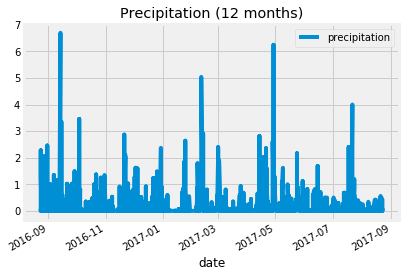

<Figure size 432x288 with 0 Axes>

In [19]:
# Use Pandas Plotting with Matplotlib to plot the data

precip_df.plot(title="Precipitation (12 months)")
plt.legend(loc='upper right')
plt.xticks(rotation='30')
plt.savefig= ('Precip.png')
plt.show()
plt.tight_layout()

In [20]:
# Use Pandas to calcualte the summary statistics for the precipitation data

precip_df.describe()

,precipitation
count,2223.000000
mean,0.159951
std,0.441220
min,0.000000
25%,0.000000
50%,0.010000
75%,0.110000
max,6.700000


## Part 1.2 - Station Analysis

In [21]:
# Design a query to show how many stations are available in this dataset?
stations=session.query(Station.station).count()
print(f"Total Number of Stations Available: {stations}")


Total Number of Stations Available: 9


In [22]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.

active_stations = session.query(Measurement.station, 
                                func.count(Measurement.station)).group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).all()

print(f"Most Active Stations (Descending)")
active_stations

Most Active Stations (Descending)


[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [23]:
#Most active Station - USC00519281 the top of the list created in step above
most_active_station=active_stations[0][0]
print(f"Most Active Station: {most_active_station}")


Most Active Station: USC00519281


In [24]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature of the most active station?

most_active_temps = session.query(func.min(Measurement.tobs), func.max(Measurement.tobs),
                                  func.avg(Measurement.tobs)).filter(Measurement.station == most_active_station).all()
print(f"Most Active Station Temperatures")
print(f"Low: {most_active_temps[0][0]}, High: {most_active_temps[0][1]}, Average: {round(most_active_temps[0][2], 1)}")


Most Active Station Temperatures
Low: 54.0, High: 85.0, Average: 71.7


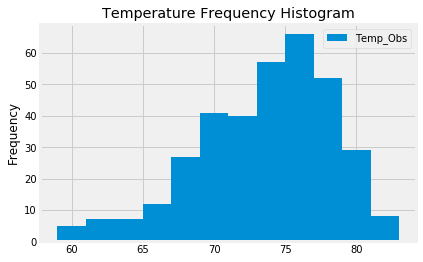

<Figure size 432x288 with 0 Axes>

In [25]:
# Choose the station with the highest number of temperature observations.
most_temps_station = session.query(Measurement.station, func.count(Measurement.tobs)).group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).first()
most_temps_station= most_temps_station[0]

# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
temp_obs = session.query(Measurement.tobs).filter(Measurement.date >= year_ago).filter(Measurement.station == most_temps_station).all()
temp_obs = pd.DataFrame(temp_obs, columns=['Temp_Obs'])

# We need 12 bins since the observation is for twelve months
temp_obs.plot.hist(bins=12, title="Temperature Frequency Histogram")
#plt.savefig('TemperatureFrequency.png')
plt.show()
plt.tight_layout()


In [26]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates

def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:start_date (string): A date string in the format %Y-%m-%d
         end_date (string): A date string in the format %Y-%m-%d
        
    Returns: TMIN, TAVE, and TMAX
    """
    query = session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()
    
    return (query)

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

[(62.0, 69.57142857142857, 74.0)]


In [27]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.

trip = calc_temps('2017-07-01','2017-07-14')
trip

[(69.0, 78.11627906976744, 87.0)]

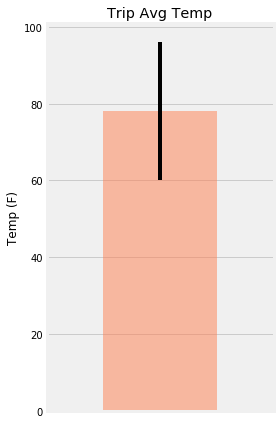

In [28]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)

trip_temp_df = pd.DataFrame(trip, columns=['tmin', 'tavg', 'tmax'])

trip_temp_df.plot.bar(y='tavg', yerr=(trip_temp_df['tmax'] - trip_temp_df['tmin']), title='Trip Avg Temp', color='coral', alpha=0.5, figsize=(4,6))
plt.xticks(np.arange(1, 1.0))
plt.ylabel("Temp (F)")
plt.tight_layout()
plt.gca().legend_.remove()
plt.show()

In [29]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation

def precip(start_date, end_date):
    
        # Docstring for the function `calc_temps`
    """Precipitation information per weather station
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        A list of tuples containing precipitation amount, station, name, latitude, longitude, and elevation in descending order.
    """
    
    sel = [Measurement.station, 
           Station.name, 
           Station.latitude, 
           Station.longitude, 
           Station.elevation, 
           Measurement.prcp]
    
    return session.query(*sel).\
            filter(Measurement.station == Station.station).filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).group_by(Measurement.station).order_by(Measurement.prcp.desc()).all()

print(precip('2015-05-15','2017-05-31'))

[('USC00519281', 'WAIHEE 837.5, HI US', 21.45167, -157.84888999999998, 32.9, 0.25), ('USC00513117', 'KANEOHE 838.1, HI US', 21.4234, -157.8015, 14.6, 0.1), ('USC00519397', 'WAIKIKI 717.2, HI US', 21.2716, -157.8168, 3.0, 0.02), ('USC00511918', 'HONOLULU OBSERVATORY 702.2, HI US', 21.3152, -157.9992, 0.9, 0.0), ('USC00514830', 'KUALOA RANCH HEADQUARTERS 886.9, HI US', 21.5213, -157.8374, 7.0, 0.0), ('USC00516128', 'MANOA LYON ARBO 785.2, HI US', 21.3331, -157.8025, 152.4, 0.0), ('USC00517948', 'PEARL CITY, HI US', 21.3934, -157.9751, 11.9, 0.0), ('USC00518838', 'UPPER WAHIAWA 874.3, HI US', 21.4992, -158.0111, 306.6, 0.0), ('USC00519523', 'WAIMANALO EXPERIMENTAL FARM, HI US', 21.33556, -157.71139, 19.5, 0.0)]


## Optional Challenge Assignment

In [30]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("11-23")

[(64.0, 72.2, 80.0)]

In [31]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip
start_date= '2015-03-15'
end_date='2015-03-31'

# Use the start and end date to create a range of dates
dates = session.query(Measurement.date).filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).group_by(Measurement.date).all()
trip_dates = [x[0] for x in dates]

# Stip off the year and save a list of %m-%d strings
trip_dates_stripped= [x[5:] for x in trip_dates]
start_month_day = trip_dates_stripped[0]
end_month_day = trip_dates_stripped[-1]


# Loop through the list of %m-%d strings and calculate the normals for each date
daily_normals = [session.query(func.min(Measurement.tobs),
                       func.avg(Measurement.tobs),
                       func.max(Measurement.tobs)).filter(func.strftime("%m-%d", Measurement.date) >= start_month_day).filter(func.strftime("%m-%d", Measurement.date) <= end_month_day).group_by(func.strftime("%m-%d", Measurement.date)).all()]

daily_normals = daily_normals[0]
 
print(f"Aggregate Daily Normals for {start_date} to {end_date}")
daily_normals

Aggregate Daily Normals for 2015-03-15 to 2015-03-31


[(58.0, 68.54716981132076, 76.0),
 (60.0, 69.70370370370371, 78.0),
 (57.0, 68.54, 75.0),
 (57.0, 67.7843137254902, 76.0),
 (60.0, 69.1, 75.0),
 (62.0, 70.11764705882354, 80.0),
 (60.0, 71.07692307692308, 77.0),
 (65.0, 71.75471698113208, 77.0),
 (63.0, 70.79629629629629, 78.0),
 (62.0, 71.5, 77.0),
 (63.0, 71.5, 78.0),
 (64.0, 71.38, 80.0),
 (63.0, 71.53846153846153, 80.0),
 (59.0, 71.51785714285714, 82.0),
 (58.0, 71.35714285714286, 77.0),
 (62.0, 72.17543859649123, 79.0),
 (61.0, 71.875, 79.0)]

In [32]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index
daily_normals_df= pd.DataFrame(daily_normals,columns=['tmin', 'tavg', 'tmax'])

# Add trip_dates to Pandas DataFrame
daily_normals_df['date']= trip_dates

# Change datatype from element to datetime object on Pandas, makes x axis title to add 
daily_normals_df['date'] = pd.to_datetime(daily_normals_df['date'], format='%Y-%m-%d')

# Set index to date
daily_normals_df.set_index('date',inplace=True)

daily_normals_df

,tmin,tavg,tmax
date,,,
2015-03-15,58.0,68.547170,76.0
2015-03-16,60.0,69.703704,78.0
2015-03-17,57.0,68.540000,75.0
2015-03-18,57.0,67.784314,76.0
2015-03-19,60.0,69.100000,75.0
2015-03-20,62.0,70.117647,80.0
2015-03-21,60.0,71.076923,77.0
2015-03-22,65.0,71.754717,77.0
2015-03-23,63.0,70.796296,78.0


In [33]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index
daily_normals_df= pd.DataFrame(daily_normals,columns=['tmin', 'tavg', 'tmax'])

# Add trip_dates to Pandas DataFrame
daily_normals_df['date']= trip_dates

# Change datatype from element to datetime object on Pandas, makes x axis title to add 
daily_normals_df['date'] = pd.to_datetime(daily_normals_df['date'], format='%Y-%m-%d')

# Set index to date
daily_normals_df.set_index('date',inplace=True)

daily_normals_df

,tmin,tavg,tmax
date,,,
2015-03-15,58.0,68.547170,76.0
2015-03-16,60.0,69.703704,78.0
2015-03-17,57.0,68.540000,75.0
2015-03-18,57.0,67.784314,76.0
2015-03-19,60.0,69.100000,75.0
2015-03-20,62.0,70.117647,80.0
2015-03-21,60.0,71.076923,77.0
2015-03-22,65.0,71.754717,77.0
2015-03-23,63.0,70.796296,78.0


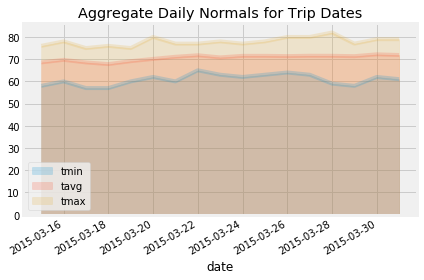

In [34]:
# Plot the daily normals as an area plot with `stacked=False`
daily_normals_df.plot(kind='area', alpha=.2, stacked=False, x_compat=True, title="Aggregate Daily Normals for Trip Dates")
plt.tight_layout()
plt.show()